- Node: perform computation and have zero or more inputs and outputs. Data that moves between nodes are tensors, which are multi-dimensional arrays of real values.
- Edges: the graph defines the flow of data, branching, looping and updates to state. 
- Opereation: a named abstract computation which can take input attributes and produce output atributes. Ex: add/divide operation

In [6]:
import tensorflow as tf
sess = tf.Session()
a = tf.constant(10)
b = tf.constant(32)
print(sess.run(a+b))

42


## Linear Regression with TensorFlow

In [5]:
import numpy as np
import tensorflow as tf
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (10, 6)

# create 100 data points: y = 0.1 x +.3
x_data = np.random.rand(100).astype(np.float32)
y_data = 0.1 * x_data + .3

# Try  to find values for W, b s.t: y = w*x +b
w = tf.Variable(tf.random_uniform([1], -1, 1))
b = tf.Variable(tf.zeros([1]))
y = w * x_data + b

# Minimize the mean squared errors:
loss = tf.reduce_mean(tf.square(y-y_data))
optimizer = tf.train.GradientDescentOptimizer(0.5)
train = optimizer.minimize(loss)

# Initialize the variables
init = tf.initialize_all_variables()

# Launch the graph
sess = tf.Session()
sess.run(init)

# Fit the line
for step in xrange(201):
    sess.run(train)
    if step % 20 == 0:
        print(step,sess.run(w), sess.run(b))

# Learns best fit is W = 0.1, b = 0.3        

(0, array([ 0.03335816], dtype=float32), array([ 0.48357326], dtype=float32))
(20, array([ 0.0637418], dtype=float32), array([ 0.32032865], dtype=float32))
(40, array([ 0.08980974], dtype=float32), array([ 0.30571333], dtype=float32))
(60, array([ 0.09713605], dtype=float32), array([ 0.30160573], dtype=float32))
(80, array([ 0.09919509], dtype=float32), array([ 0.30045131], dtype=float32))
(100, array([ 0.09977377], dtype=float32), array([ 0.30012685], dtype=float32))
(120, array([ 0.09993641], dtype=float32), array([ 0.30003566], dtype=float32))
(140, array([ 0.09998213], dtype=float32), array([ 0.30001003], dtype=float32))
(160, array([ 0.09999496], dtype=float32), array([ 0.30000284], dtype=float32))
(180, array([ 0.09999859], dtype=float32), array([ 0.30000079], dtype=float32))
(200, array([ 0.0999996], dtype=float32), array([ 0.30000025], dtype=float32))


## Linear regression: 2nd code

In [6]:
# initialize the variables a and b, with any random guess,
a = tf.Variable(1.0)
b = tf.Variable(0.2)
y = a * x_data + b
#To find Loss's value, we use __tf.reduce_mean()__. 
# This function finds the mean of a multidimensional tensor, and the result can have a diferent dimension.
loss = tf.reduce_mean(tf.square(y - y_data))
# optimizer method: gradient descent with a learning rate of 0.5: 
#.minimize()__ will minimize the error function of our optimizer, resulting in a better model.
optimizer = tf.train.GradientDescentOptimizer(0.5)
train = optimizer.minimize(loss)
init = tf.global_variables_initializer()
sess = tf.Session()
sess.run(init)
# Run the graph
train_data = []
for step in range(100):
    evals = sess.run([train,a,b])[1:]
    if step % 5 == 0:
        print(step, evals)
        train_data.append(evals)

(0, [0.73176467, -0.17356972])
(5, [0.59717858, 0.021516776])
(10, [0.46191591, 0.09708631])
(15, [0.36351353, 0.15225755])
(20, [0.29186594, 0.19242774])
(25, [0.23969886, 0.22167593])
(30, [0.20171565, 0.24297173])
(35, [0.17405982, 0.25847736])
(40, [0.15392342, 0.26976711])
(45, [0.13926199, 0.27798724])
(50, [0.12858692, 0.28397235])
(55, [0.12081432, 0.28833017])
(60, [0.11515506, 0.29150313])
(65, [0.11103449, 0.29381338])
(70, [0.10803428, 0.29549548])
(75, [0.1058498, 0.29672024])
(80, [0.10425929, 0.29761198])
(85, [0.10310122, 0.29826128])
(90, [0.10225802, 0.29873404])
(95, [0.10164407, 0.29907826])


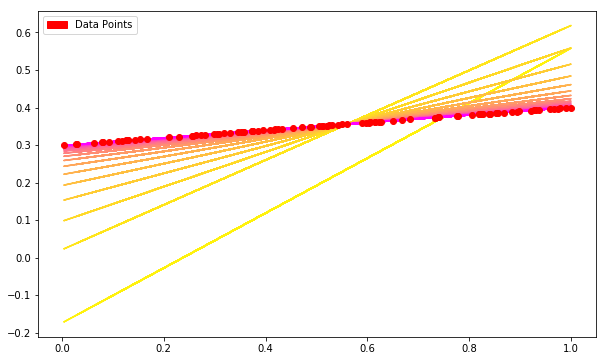

In [7]:
converter = plt.colors
cr, cg, cb = (1.0, 1.0, 0.0)
for f in train_data:
    cb += 1.0 / len(train_data)
    cg -= 1.0 / len(train_data)
    if cb > 1.0: cb = 1.0
    if cg < 0.0: cg = 0.0
    [a, b] = f
    f_y = np.vectorize(lambda x: a*x + b)(x_data)
    line = plt.plot(x_data, f_y)
    plt.setp(line, color=(cr,cg,cb))

plt.plot(x_data, y_data, 'ro')
green_line = mpatches.Patch(color='red', label='Data Points')
plt.legend(handles=[green_line])
plt.show()

## Logistic regression:

In [10]:
import tensorflow as tf
import pandas as pd
import numpy as np
import time
from sklearn.datasets import load_iris
from sklearn.cross_validation import train_test_split
import matplotlib.pyplot as plt
iris = load_iris()
iris_X, iris_y = iris.data[:-1,:], iris.target[:-1]
iris_y = pd.get_dummies(iris_y).values
trainX, testX, trainY, testY = train_test_split(iris_X, iris_y, test_size = 0.33, random_state = 42)

/home/thu/anaconda2/lib/python2.7/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


Now we define x and y. These placeholders will hold our iris data (both the features and label matrices), and help pass them along to different parts of the algorithm. You can consider placeholders as empty shells into which we insert our data. We also need to give them shapes which correspond to the shape of our data. Later, we will insert data into these placeholders by “feeding” the placeholders the data via a “feed_dict” (Feed Dictionary).

### Why use Placeholders?  
1) This feature of TensorFlow allows us to create an algorithm which accepts data and knows something about the shape of the data without knowing the amount of data going in. <br><br>
2) When we insert “batches” of data in training, we can easily adjust how many examples we train on in a single step without changing the entire algorithm.
### model
$$
ŷ =sigmoid(WX+b)
$$

For the sake of clarity, we can have it broken into its three main components: 
- a weight times features matrix multiplication operation, 
- a summation of the weighted features and a bias term, 
- and finally the application of a sigmoid function. 

In [14]:
# numFeatures is the number of features in our input data.
numFeatures = trainX.shape[1]
# numLabels is the number of classes our data points can be in.
numLabels = trainY.shape[1]
# Placeholders
# 'None' means TensorFlow shouldn't expect a fixed number in that dimension
X = tf.placeholder(tf.float32, [None, numFeatures]) # Iris has 4 features, so X is a tensor to hold our data.
yGold = tf.placeholder(tf.float32, [None, numLabels]) # This will be our correct answers matrix for 3 classes.
W = tf.Variable(tf.zeros([4,3])) # 4 - dimensional input; 3 classes in the output
b = tf.Variable(tf.zeros([3])) # 3 - dimensional output [0,0,1],[0,1,0],[1,0,0]
#Randomly sample from a normal distribution with standard deviation .01
weights = tf.Variable(tf.random_normal([numFeatures,numLabels],
                                       mean=0,
                                       stddev=0.01,
                                       name="weights"))
bias = tf.Variable(tf.random_normal([1,numLabels],
                                    mean=0,
                                    stddev=0.01,
                                    name="bias"))
# Three-component breakdown of the Logistic Regression equation.
# Note that these feed into each other.
apply_weights_OP = tf.matmul(X, weights, name="apply_weights")
add_bias_OP = tf.add(apply_weights_OP, bias, name="add_bias") 
activation_OP = tf.nn.sigmoid(add_bias_OP, name="activation")

As we have seen before, the function we are going to use is the _logistic function_ $(\frac{1}{1+e^{-x}})$, which is fed the input data after applying weights and bias. In TensorFlow, this function is implemented as the `nn.sigmoid` function. Effectively, this fits the weighted input with bias into a 0-100 percent curve, which is the probability function we want.

In [16]:
numEpochs = 700
# Defining our learning rate iterations (decay)
learningRate = tf.train.exponential_decay(learning_rate=0.0008,
                                          global_step= 1,
                                          decay_steps=trainX.shape[0],
                                          decay_rate= 0.95,
                                          staircase=True)
#Defining our cost function - Squared Mean Error
cost_OP = tf.nn.l2_loss(activation_OP-yGold, name="squared_error_cost")
training_OP = tf.train.GradientDescentOptimizer(learningRate).minimize(cost_OP)
sess = tf.Session()
init_OP = tf.global_variables_initializer()
# Initialize all tensorflow variables
sess.run(init_OP)
# argmax(activation_OP, 1) returns the label with the most probability
# argmax(yGold, 1) is the correct label
correct_predictions_OP = tf.equal(tf.argmax(activation_OP,1),tf.argmax(yGold,1))
# If every false prediction is 0 and every true prediction is 1, the average returns us the accuracy
accuracy_OP = tf.reduce_mean(tf.cast(correct_predictions_OP, "float"))
# Summary op for regression output
activation_summary_OP = tf.summary.histogram("output", activation_OP)
# Summary op for accuracy
accuracy_summary_OP = tf.summary.scalar("accuracy", accuracy_OP)
# Summary op for cost
cost_summary_OP = tf.summary.scalar("cost", cost_OP)
# Summary ops to check how variables (W, b) are updating after each iteration
weightSummary = tf.summary.histogram("weights", weights.eval(session=sess))
biasSummary = tf.summary.histogram("biases", bias.eval(session=sess))
# Merge all summaries
merged = tf.summary.merge([activation_summary_OP, accuracy_summary_OP, cost_summary_OP, weightSummary, biasSummary])
# Summary writer
writer = tf.summary.FileWriter("summary_logs", sess.graph)

In [17]:
# Initialize reporting variables
cost = 0
diff = 1
epoch_values = []
accuracy_values = []
cost_values = []
# Training epochs
for i in range(numEpochs):
    if i > 1 and diff < .0001:
        print("change in cost %g; convergence."%diff)
        break
    else:
        # Run training step
        step = sess.run(training_OP, feed_dict={X: trainX, yGold: trainY})
        # Report occasional stats
        if i % 10 == 0:
            # Add epoch to epoch_values
            epoch_values.append(i)
            # Generate accuracy stats on test data
            train_accuracy, newCost = sess.run([accuracy_OP, cost_OP], feed_dict={X: trainX, yGold: trainY})
            # Add accuracy to live graphing variable
            accuracy_values.append(train_accuracy)
            # Add cost to live graphing variable
            cost_values.append(newCost)
            # Re-assign values for variables
            diff = abs(newCost - cost)
            cost = newCost
            #generate print statements
            print("step %d, training accuracy %g, cost %g, change in cost %g"%(i, train_accuracy, newCost, diff))

# How well do we perform on held-out test data?
print("final accuracy on test set: %s" %str(sess.run(accuracy_OP, 
                                                     feed_dict={X: testX, 
                                                                yGold: testY})))

step 0, training accuracy 0.353535, cost 34.7759, change in cost 34.7759
step 10, training accuracy 0.515152, cost 30.0988, change in cost 4.67711
step 20, training accuracy 0.646465, cost 28.1636, change in cost 1.93526
step 30, training accuracy 0.646465, cost 26.5279, change in cost 1.63568
step 40, training accuracy 0.646465, cost 25.1665, change in cost 1.3614
step 50, training accuracy 0.646465, cost 24.0401, change in cost 1.12639
step 60, training accuracy 0.646465, cost 23.1066, change in cost 0.933472
step 70, training accuracy 0.646465, cost 22.3283, change in cost 0.778391
step 80, training accuracy 0.646465, cost 21.6736, change in cost 0.654667
step 90, training accuracy 0.646465, cost 21.1176, change in cost 0.55596
step 100, training accuracy 0.666667, cost 20.6408, change in cost 0.476852
step 110, training accuracy 0.666667, cost 20.2278, change in cost 0.413021
step 120, training accuracy 0.666667, cost 19.8667, change in cost 0.361092
step 130, training accuracy 0.6

/home/thu/anaconda2/lib/python2.7/site-packages/numpy/core/fromnumeric.py:2889: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/home/thu/anaconda2/lib/python2.7/site-packages/numpy/core/_methods.py:80: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


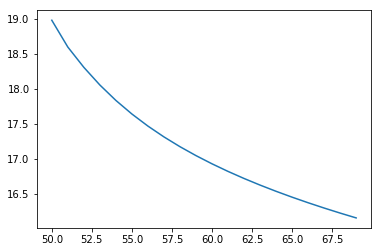

In [18]:
# plot the cost
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
plt.plot([np.mean(cost_values[i-50:i]) for i in range(len(cost_values))])
plt.show()

## Iris classification:

Input function returns a tf.data.Dataset object which outputs:
- features: a dictionary: each key is the  name of a feature; each value is  an array containing all of that feature's values
- label: an array containing the values of the label for every example

In [ ]:
def input_evaluation_set():
    features = {
        'SepalLength': np.array
    }